In [24]:
#descargar API overpass
import osmnx as ox
import matplotlib.pyplot as plt
%matplotlib inline

# Specify the name that is used to seach for the data
place_name = "San Borja,Peru"

# Fetch OSM street network from the location
graph = ox.graph_from_place(place_name, network_type='drive', which_result=1)
type(graph)
ciudad=""
s=1
for i in range(len(place_name)):
   if place_name[i]!=',' and s==1:
        ciudad+=place_name[i]
   if place_name[i]==',':
        s=2
print(ciudad)


San Borja


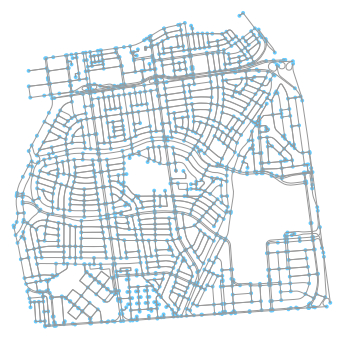

In [3]:
fig, ax = ox.plot_graph(graph)

In [28]:

area = ox.gdf_from_place(place_name)
selected_amenities = ['hospital', 'clinic', 'doctors']
#hospital = ox.pois.pois_from_place(place_name, amenities=['hospital'])
hospital = ox.pois_from_place(place=place_name, amenities=selected_amenities)
hospital = hospital[hospital['addr:city'] == ciudad]
print(type(hospital))

<class 'geopandas.geodataframe.GeoDataFrame'>


In [43]:
restaurants = ox.pois_from_place(place_name, amenities=['restaurant'])

# How many restaurants do we have?
len(restaurants)


141

In [44]:
len(hospital)

53

In [45]:
# Retrieve the footprint of our location
area = ox.gdf_from_place(place_name)

# Retrieve buildings from the area
#buildings = ox.buildings_from_place(place_name)

# What types are those?
print(type(area))
#print(type(buildings))

<class 'geopandas.geodataframe.GeoDataFrame'>


In [ ]:
# Retrieve restaurants
restaurants = ox.pois_from_place(place_name, amenities=['restaurant'])

# How many restaurants do we have?
len(restaurants)


In [46]:
hospital.columns

Index(['addr:city', 'addr:door', 'addr:full', 'addr:housenumber',
       'addr:street', 'amenity', 'element_type', 'email', 'geometry',
       'healthcare', 'healthcare:speciality', 'name', 'old_name',
       'opening_hours', 'operator', 'osmid', 'phone', 'ref:category',
       'ref:microred', 'ref:red', 'room', 'source', 'website', 'Source',
       'addr:postcode', 'alt_name', 'building', 'emergency', 'name:en',
       'name:es', 'nodes', 'toilets:wheelchair', 'wheelchair',
       'wheelchair:description', 'wikidata', 'wikipedia'],
      dtype='object')

In [29]:
# Select some useful cols and print
cols = ['name', 'opening_hours', 'addr:city', 'geometry',
        'building', 'addr:full', 'addr:street','osmid',]
# Print only selected cols
hospital[cols].head(10)

,name,opening_hours,addr:city,geometry,building,addr:full,addr:street,osmid
4367125589,Instituto de Neurocirugia,NaN,San Borja,POINT (-77.0081462 -12.0924635),NaN,NaN,NaN,4367125589
5485493582,SISOL Salud Centro Quirúrgico,Mo-Sa 08:00-20:00,San Borja,POINT (-77.007959 -12.1004575),NaN,NaN,Avenida San Borja Sur,5485493582
5577497869,Mácula D&T,NaN,San Borja,POINT (-77.0080055 -12.0896306),NaN,NaN,Calles Carlos Ferreyros,5577497869
5605942363,Clínica Odontomédica Galla,Mo-Fr 09:00-22:30; Sa 09:00-13:00,San Borja,POINT (-77.0071179 -12.1006269),NaN,NaN,Avenida San Borja Sur,5605942363
5612802334,Andromed,Mo-Fr 08:00-17:00; Sa 09:30-13:30,San Borja,POINT (-77.00900559999999 -12.0998048),NaN,NaN,Avenida San Borja Sur,5612802334
5612802339,Inmuno Vax,NaN,San Borja,POINT (-77.0089232 -12.0998882),NaN,NaN,Avenida San Borja Sur,5612802339
5612802358,IBN Sina,Mo-Fr 09:00-21:00; Sa 09:00-18:00,San Borja,POINT (-77.00473839999999 -12.1015327),NaN,NaN,Avenida San Borja Sur,5612802358
151303103,Instituto Nacional de Salud del Niño,NaN,San Borja,"POLYGON ((-76.9928302 -12.0851431, -76.9917068...",NaN,NaN,Avenida Agustín de la Rosa Toro,151303103
399538210,Clínica Santa Isabel,Mo-Fr 07:00-20:30; Sa 07:00-18:00,San Borja,"POLYGON ((-77.00736879999999 -12.0893091, -77....",yes,NaN,Avenida Guardia Civil,399538210
401484780,Oncosalud,NaN,San Borja,"POLYGON ((-77.00788129999999 -12.0905843, -77....",yes,NaN,Avenida Guardia Civil,401484780


In [30]:
nodes, edges = ox.graph_to_gdfs(graph)
print("Nodes:\n", nodes.head(), '\n')
print("Edges:\n", edges.head(), '\n')
print("Type:", type(edges))

Nodes:
           highway      osmid  ref          x          y  \
416960527     NaN  416960527  NaN -76.984214 -12.086504   
416960534     NaN  416960534  NaN -76.993865 -12.086933   
473980952     NaN  473980952  NaN -77.002907 -12.108915   
416960536     NaN  416960536  NaN -76.982816 -12.088868   
416960537     NaN  416960537  NaN -76.981493 -12.088656   

                                         geometry  
416960527         POINT (-76.9842143 -12.0865041)  
416960534          POINT (-76.993865 -12.0869328)  
473980952  POINT (-77.00290699999999 -12.1089147)  
416960536         POINT (-76.9828158 -12.0888684)  
416960537         POINT (-76.9814933 -12.0886559)   

Edges:
   bridge                                           geometry      highway  \
0    NaN  LINESTRING (-76.9842143 -12.0865041, -76.98426...  residential   
1    NaN  LINESTRING (-76.993865 -12.0869328, -76.993778...  residential   
2    NaN  LINESTRING (-76.993865 -12.0869328, -76.992748...      primary   
3    NaN  L

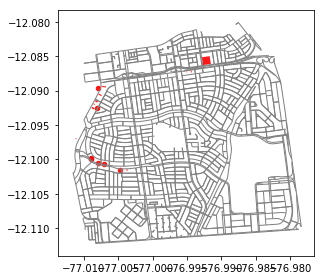

In [31]:
ax = area.plot(facecolor='white')

# Plot street edges
edges.plot(ax=ax, linewidth=1, edgecolor='gray')

# Plot buildings
#buildings.plot(ax=ax, facecolor='khaki', alpha=0.7)

# Plot restaurants
hospital.plot(ax=ax, color='red', alpha=0.9, markersize=20)
plt.tight_layout( )


In [25]:
area = ox.gdf_from_place(place_name)
selected_amenities = ['hospital']
#hospital = ox.pois.pois_from_place(place_name, amenities=['hospital'])

hospital = ox.pois_from_place(place=place_name, amenities=selected_amenities)
#filtra los datos por el nombre de la ciudad o distrito
hospital = hospital[hospital['addr:city'] == ciudad]
print(type(hospital))

<class 'geopandas.geodataframe.GeoDataFrame'>


In [26]:
nodes, edges = ox.graph_to_gdfs(graph)
print("Nodes:\n", nodes.head(), '\n')
print("Edges:\n", edges.head(), '\n')
print("Type:", type(edges))

Nodes:
           highway      osmid  ref          x          y  \
416960527     NaN  416960527  NaN -76.984214 -12.086504   
416960534     NaN  416960534  NaN -76.993865 -12.086933   
473980952     NaN  473980952  NaN -77.002907 -12.108915   
416960536     NaN  416960536  NaN -76.982816 -12.088868   
416960537     NaN  416960537  NaN -76.981493 -12.088656   

                                         geometry  
416960527         POINT (-76.9842143 -12.0865041)  
416960534          POINT (-76.993865 -12.0869328)  
473980952  POINT (-77.00290699999999 -12.1089147)  
416960536         POINT (-76.9828158 -12.0888684)  
416960537         POINT (-76.9814933 -12.0886559)   

Edges:
   bridge                                           geometry      highway  \
0    NaN  LINESTRING (-76.9842143 -12.0865041, -76.98426...  residential   
1    NaN  LINESTRING (-76.993865 -12.0869328, -76.993778...  residential   
2    NaN  LINESTRING (-76.993865 -12.0869328, -76.992748...      primary   
3    NaN  L

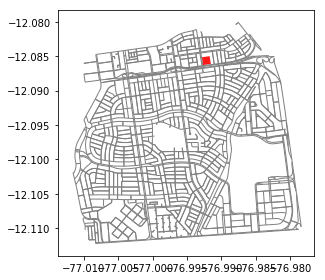

In [27]:
ax = area.plot(facecolor='white')

# Plot street edges
edges.plot(ax=ax, linewidth=1, edgecolor='gray')

# Plot buildings
#buildings.plot(ax=ax, facecolor='khaki', alpha=0.7)

# Plot restaurants
hospital.plot(ax=ax, color='red', alpha=0.9, markersize=20)
plt.tight_layout( )

In [8]:
hospital.columns

Index(['addr:city', 'addr:housenumber', 'addr:street', 'amenity',
       'element_type', 'email', 'emergency', 'geometry',
       'healthcare:speciality', 'name', 'nodes', 'operator', 'osmid', 'phone',
       'ref:category', 'ref:microred', 'ref:red', 'website', 'wikidata',
       'wikipedia'],
      dtype='object')

In [33]:
# Select some useful cols and print
cols = ['name', 'wikidata', 'addr:city', 'geometry',
        'amenity', 'nodes', 'emergency','osmid',]
# Print only selected cols
hospital[cols].head(50)

,name,wikidata,addr:city,geometry,amenity,nodes,emergency,osmid
4367125589,Instituto de Neurocirugia,NaN,San Borja,POINT (-77.0081462 -12.0924635),clinic,NaN,NaN,4367125589
5485493582,SISOL Salud Centro Quirúrgico,NaN,San Borja,POINT (-77.007959 -12.1004575),clinic,NaN,NaN,5485493582
5577497869,Mácula D&T,NaN,San Borja,POINT (-77.0080055 -12.0896306),clinic,NaN,NaN,5577497869
5605942363,Clínica Odontomédica Galla,NaN,San Borja,POINT (-77.0071179 -12.1006269),clinic,NaN,NaN,5605942363
5612802334,Andromed,NaN,San Borja,POINT (-77.00900559999999 -12.0998048),clinic,NaN,NaN,5612802334
5612802339,Inmuno Vax,NaN,San Borja,POINT (-77.0089232 -12.0998882),clinic,NaN,NaN,5612802339
5612802358,IBN Sina,NaN,San Borja,POINT (-77.00473839999999 -12.1015327),clinic,NaN,NaN,5612802358
151303103,Instituto Nacional de Salud del Niño,Q17634865,San Borja,"POLYGON ((-76.9928302 -12.0851431, -76.9917068...",hospital,"[1641248415, 1641248430, 1641248354, 164124842...",NaN,151303103
399538210,Clínica Santa Isabel,NaN,San Borja,"POLYGON ((-77.00736879999999 -12.0893091, -77....",clinic,"[4022706243, 4022706244, 4022706245, 402270624...",NaN,399538210
401484780,Oncosalud,NaN,San Borja,"POLYGON ((-77.00788129999999 -12.0905843, -77....",clinic,"[4039081715, 4039081716, 4039081717, 403908171...",NaN,401484780
